# Outline
1. [Frame the probelm and look at the big picture ](#1)
2. [Get the Data](#2)
3. [Explore the data to gain insights](#3)
4. [Prepare the data to better expose the underlying patterns to Machine Learning algorithms](#4)
5. [Explore many different models and short-list the best ones](#5)
6. [Fine-tune your models and combine them into a great solution](#6)
7. [Present your solution](#7)
8. [Launch, monitor, and maintain your system](#8)


<a name='1'></a>
# 1. Frame the Problem and look at the big picture
Use a Neural Network model that can identify hand written digits, using the MNIST dataset.


In [1]:
# Get the data.
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# To split the data.
from sklearn.model_selection import StratifiedShuffleSplit

# Import numpy to work with numpy arrays.
import numpy as np

# Import tensorflow & functions to create the Neural Network.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu


%matplotlib widget
import matplotlib.pyplot as plt

#
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

2023-12-02 20:42:14.925499: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-02 20:42:15.027825: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 20:42:15.027871: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 20:42:15.027932: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 20:42:15.052862: I tensorflow/core/platform/cpu_feature_g

<a name='2'></a>
# 2. Get the Data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/home/jp/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<a name='3'></a>
# 3. Explore the data to gain insight

In [3]:
# Load the dataset
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

numpy.ndarray

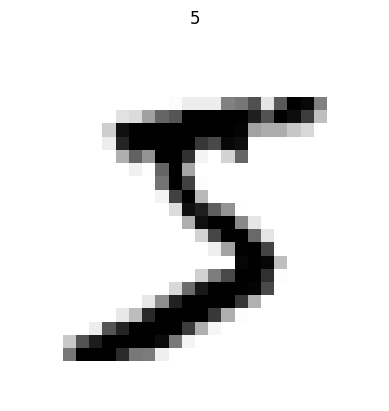

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.title(y[0])
plt.show()

<a name='4'></a>
# 4. Prepare the Data

In [6]:
y = y.astype(np.uint8)

In [7]:
# Split the dataset (X, y) into two sets: A training and a temporary set (X_, y_).
split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=51)
for train_index, test_index in split.split(X, y):
    X_train, X_ = X[train_index], X[test_index]
    y_train, y_ = y[train_index], y[test_index]

In [8]:
# Split the temp set (X_, y_) into two sets: A validation and a test set.
split2 = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=51)
for train_index, test_index in split2.split(X_, y_):
    X_val, X_test = X[train_index], X[test_index]
    y_val, y_test = y[train_index], y[test_index]

In [9]:
print('Shape of the traning features (X_train): ', X_train.shape)
print('Shape of the training targets (y_train): ', y_train.shape, '\n')

print('Shape of the validation features (X_val): ', X_val.shape)
print('Shape of the validation targets (y_val): ', y_val.shape, '\n')

print('Shape of the test featrues (X_test): ', X_test.shape)
print('Shape of the target features (y_test): ', y_test.shape)

Shape of the traning features (X_train):  (50000, 784)
Shape of the training targets (y_train):  (50000,) 

Shape of the validation features (X_val):  (10000, 784)
Shape of the validation targets (y_val):  (10000,) 

Shape of the test featrues (X_test):  (10000, 784)
Shape of the target features (y_test):  (10000,)


In [10]:
# Scale down the features of each dataset.
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

<a name='5'></a>
# 5. Train a Neural Network.

In [11]:
# Build a Neural Network Model.
tf.random.set_seed(51)
model = Sequential(
    [                     
        Dense(25, activation = 'relu', name="L1"),
        Dense(15, activation = 'relu', name="L2"),
        Dense(10, name="L3")

    ], name = "model_0" 
)

2023-12-02 20:42:43.482878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-02 20:42:43.498580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-02 20:42:43.498658: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-02 20:42:43.501123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-02 20:42:43.501202: I tensorflow/compile

In [13]:
# Compile the Model.
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [15]:
# Train the Model.
history = model.fit(
    X_train,y_train,
    epochs=3,
    validation_data=(X_val, y_val)
)

Epoch 1/3


2023-12-02 20:31:05.100350: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-02 20:31:05.249528: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feb7e55d0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-02 20:31:05.249581: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2023-12-02 20:31:05.257411: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-02 20:31:05.294208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-02 20:31:05.430501: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 16s 9ms/step - loss: 0.4484 - accuracy: 0.8645 - val_loss: 0.2239 - val_accuracy: 0.9350
Epoch 2/3
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.1686 - val_accuracy: 0.9511
Epoch 3/3
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1587 - accuracy: 0.9535 - val_loss: 0.1319 - val_accuracy: 0.9597


In [14]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

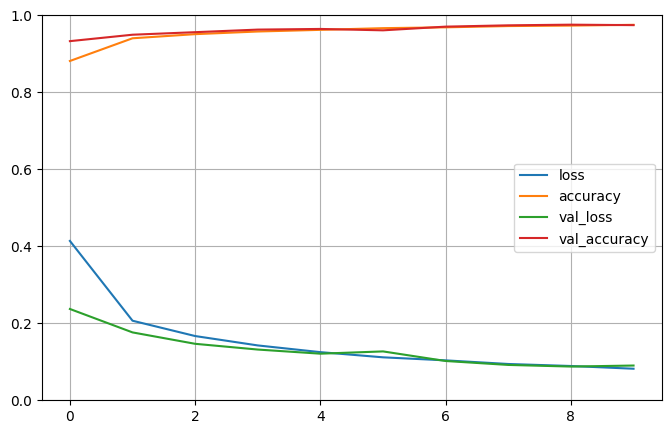

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# Evaluate the model on the test set.
eval = model.evaluate(X_test, y_test, batch_size=2)

5000/5000 [==============================] - 28s 6ms/step - loss: 0.0924 - accuracy: 0.9732
